In [1]:
%matplotlib notebook
%matplotlib notebook  
%load_ext autoreload
%autoreload 2

## Igor's speedy method...

In [2]:
from __future__ import print_function, absolute_import
from IPython import display
import math
import matplotlib.pyplot as plt
import numpy as np

from multiple_traj_opt import (
    make_mto,
    MultipleTrajOpt,
    initial_conditions_Russ,
    initial_conditions_grid,
    initial_conditions_random,
    initial_conditions_random_all_dims,
)
from nn_system.networks import *

from igor import (
    do_igor_optimization,
    igor_traj_opt_serial,
    igor_traj_opt_parallel,
    igor_supervised_learning,
    igor_supervised_learning_cuda,
    visualize_intermediate_results,
)

## Applying to Pendulum

doing warm start 1548566942.35
100 took 0.17s
20 took 0.34s
30 took 0.36s
70 took 0.34s
0 took 0.39s
60 took 0.37s
40 took 0.39s
50 took 0.42s
10 took 0.42s
110 took 0.15s
120 took 0.20s
130 took 0.20s
140 took 0.20s
80 took 0.60s
90 took 1.61s
finished warm start 1548566944.52
quit simulation early at 9.703/16.0 due to exceeding time limit


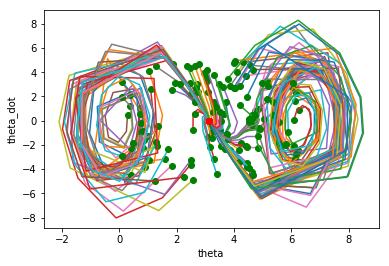

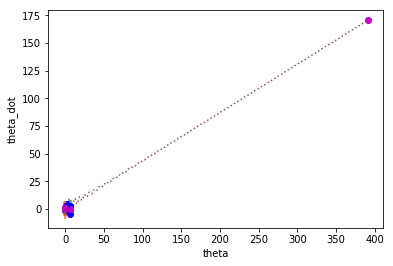

Training on 144/144 trajs
1548566962.17

saving torch state dict -> GPU_model.pt
rsync-ing files to remote
remotely training!
args:  ['/home/rverkuil/integration/drake-pytorch/python/remote_train.py', '1', '100', '5', '0.01']
(144, 32) (144, 32, 2) (144, 32, 1)
(32,) (32, 2) (32, 1)
True 100 5 0.01
(4464, 2)
(4464, 1)
using prox cost!
[1,   100] loss: 0.131 prox_loss: 0.000
[2,   100] loss: 0.037 prox_loss: 0.000
[3,   100] loss: 0.016 prox_loss: 0.000
[4,   100] loss: 0.014 prox_loss: 0.000
[5,   100] loss: 0.012 prox_loss: 0.000
Finished Training
remote net params hash:  1126939955082896088

rsyncing files back to local...
loading the new state dict...

local net params hash:  1126939955082896088
1548566971.24


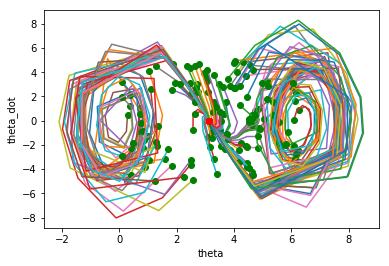

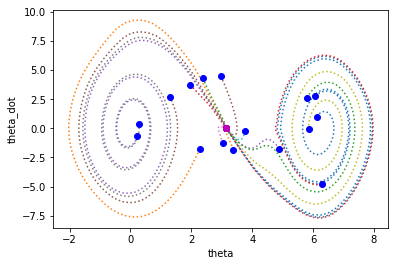

20 took 0.24s
70 took 1.11s
30 took 1.42s
0 took 1.74s
80 took 1.72s
10 took 2.07s
40 took 2.06s
50 took 2.05s
60 took 2.08s
90 took 1.75s
110 took 1.26s
100 took 2.05s
140 took 1.21s
120 took 2.01s
130 took 1.86s
Training on 144/144 trajs
1548566990.72

saving torch state dict -> GPU_model.pt
rsync-ing files to remote
remotely training!
args:  ['/home/rverkuil/integration/drake-pytorch/python/remote_train.py', '1', '100', '5', '0.01']
(144, 32) (144, 32, 2) (144, 32, 1)
(32,) (32, 2) (32, 1)
True 100 5 0.01
(4464, 2)
(4464, 1)
using prox cost!
[1,   100] loss: 0.039 prox_loss: 0.000
[2,   100] loss: 0.013 prox_loss: 0.000
[3,   100] loss: 0.012 prox_loss: 0.000
[4,   100] loss: 0.011 prox_loss: 0.000
[5,   100] loss: 0.011 prox_loss: 0.000
Finished Training
remote net params hash:  7051646647586583040

rsyncing files back to local...
loading the new state dict...

local net params hash:  7051646647586583040
1548566999.92


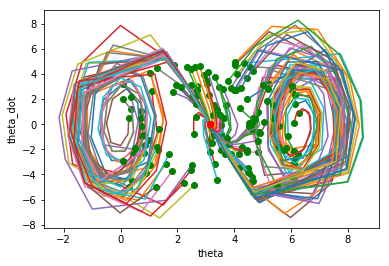

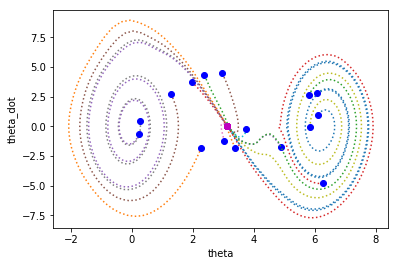

20 took 0.27s
70 took 1.28s
0 took 2.19s
10 took 2.19s
30 took 2.08s
40 took 2.08s
50 took 2.05s
60 took 2.06s
80 took 1.91s
90 took 2.06s
100 took 2.05s
110 took 1.78s
130 took 1.40s
140 took 1.44s
120 took 1.91s
Training on 144/144 trajs
1548567021.42

saving torch state dict -> GPU_model.pt
rsync-ing files to remote
remotely training!
args:  ['/home/rverkuil/integration/drake-pytorch/python/remote_train.py', '1', '100', '5', '0.01']
(144, 32) (144, 32, 2) (144, 32, 1)
(32,) (32, 2) (32, 1)
True 100 5 0.01
(4464, 2)
(4464, 1)
using prox cost!
[1,   100] loss: 0.043 prox_loss: 0.000
[2,   100] loss: 0.011 prox_loss: 0.000
[3,   100] loss: 0.011 prox_loss: 0.000
[4,   100] loss: 0.011 prox_loss: 0.000
[5,   100] loss: 0.010 prox_loss: 0.000
Finished Training
remote net params hash:  -3720878668907229187

rsyncing files back to local...
loading the new state dict...

local net params hash:  -3720878668907229187
1548567030.61


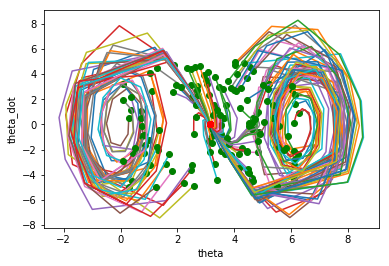

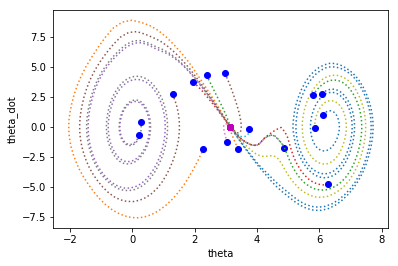

20 took 0.25s
70 took 1.15s
30 took 1.89s
60 took 1.97s
50 took 2.09s
40 took 2.13s
0 took 2.30s
10 took 2.27s
80 took 2.04s
110 took 1.28s
90 took 2.08s
100 took 2.09s
120 took 2.03s
130 took 1.79s
140 took 1.54s
Training on 144/144 trajs
1548567051.71

saving torch state dict -> GPU_model.pt
rsync-ing files to remote
remotely training!
args:  ['/home/rverkuil/integration/drake-pytorch/python/remote_train.py', '1', '100', '5', '0.01']
(144, 32) (144, 32, 2) (144, 32, 1)
(32,) (32, 2) (32, 1)
True 100 5 0.01
(4464, 2)
(4464, 1)
using prox cost!
[1,   100] loss: 0.020 prox_loss: 0.000
[2,   100] loss: 0.011 prox_loss: 0.000
[3,   100] loss: 0.010 prox_loss: 0.000
[4,   100] loss: 0.011 prox_loss: 0.000
[5,   100] loss: 0.010 prox_loss: 0.000
Finished Training
remote net params hash:  -9059283461094539968

rsyncing files back to local...
loading the new state dict...

local net params hash:  -9059283461094539968
1548567060.85
quit simulation early at 15.144/16.0 due to exceeding time lim

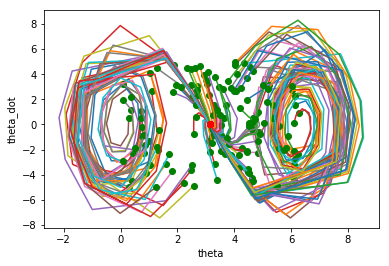

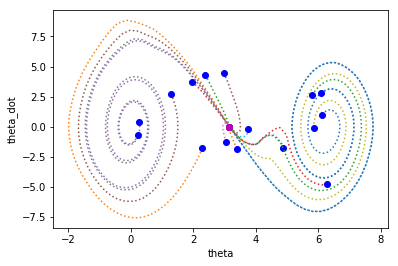

20 took 0.31s
70 took 1.09s
30 took 1.55s
10 took 2.16s
60 took 1.99s
40 took 2.07s
0 took 2.22s
50 took 2.07s
80 took 1.92s
110 took 1.67s
100 took 2.09s
90 took 2.10s
140 took 1.44s
120 took 2.06s
130 took 1.98s
Training on 144/144 trajs
1548567083.83

saving torch state dict -> GPU_model.pt
rsync-ing files to remote
remotely training!
args:  ['/home/rverkuil/integration/drake-pytorch/python/remote_train.py', '1', '100', '5', '0.01']
(144, 32) (144, 32, 2) (144, 32, 1)
(32,) (32, 2) (32, 1)
True 100 5 0.01
(4464, 2)
(4464, 1)
using prox cost!
[1,   100] loss: 0.052 prox_loss: 0.000
[2,   100] loss: 0.012 prox_loss: 0.000
[3,   100] loss: 0.010 prox_loss: 0.000
[4,   100] loss: 0.010 prox_loss: 0.000
[5,   100] loss: 0.010 prox_loss: 0.000
Finished Training
remote net params hash:  -8867811206443646618

rsyncing files back to local...
loading the new state dict...

local net params hash:  -8867811206443646618
1548567092.96


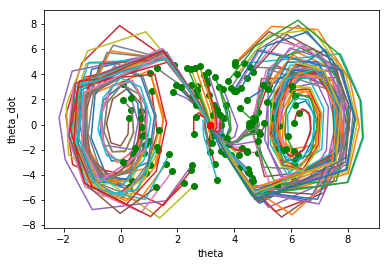

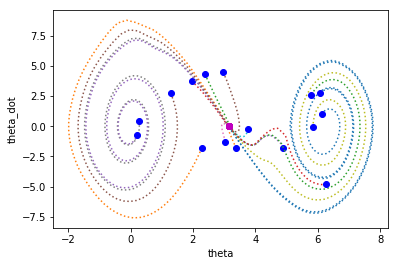

20 took 0.25s
70 took 1.05s
60 took 1.73s
10 took 2.13s
0 took 2.14s
50 took 2.08s
30 took 2.15s
40 took 2.17s
80 took 1.86s
90 took 2.10s
110 took 1.66s
100 took 2.06s
120 took 1.80s
140 took 1.36s
130 took 1.67s
Training on 144/144 trajs
1548567115.67

saving torch state dict -> GPU_model.pt
rsync-ing files to remote
remotely training!
args:  ['/home/rverkuil/integration/drake-pytorch/python/remote_train.py', '1', '100', '5', '0.01']
(144, 32) (144, 32, 2) (144, 32, 1)
(32,) (32, 2) (32, 1)
True 100 5 0.01
(4464, 2)
(4464, 1)
using prox cost!
[1,   100] loss: 0.025 prox_loss: 0.000
[2,   100] loss: 0.010 prox_loss: 0.000
[3,   100] loss: 0.010 prox_loss: 0.000
[4,   100] loss: 0.009 prox_loss: 0.000
[5,   100] loss: 0.009 prox_loss: 0.000
Finished Training
remote net params hash:  6011101745991102584

rsyncing files back to local...
loading the new state dict...

local net params hash:  6011101745991102584
1548567124.83
quit simulation early at 15.698/16.0 due to exceeding time limit

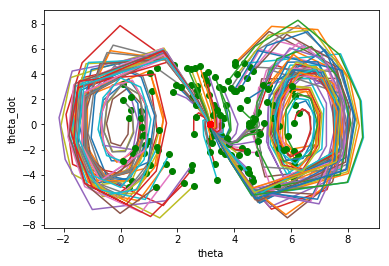

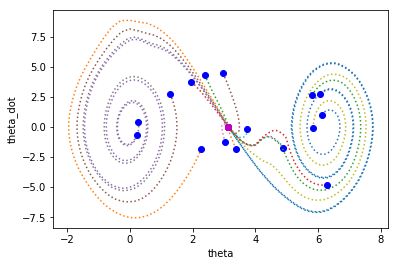

20 took 0.28s
70 took 1.23s
50 took 1.51s
0 took 2.13s
10 took 2.14s
40 took 2.11s
30 took 2.16s
60 took 2.08s
80 took 2.09s
90 took 2.06s
100 took 2.12s
110 took 1.93s
120 took 2.05s
130 took 1.90s
140 took 1.93s
Training on 144/144 trajs
1548567147.04

saving torch state dict -> GPU_model.pt
rsync-ing files to remote
remotely training!
args:  ['/home/rverkuil/integration/drake-pytorch/python/remote_train.py', '1', '100', '5', '0.01']
(144, 32) (144, 32, 2) (144, 32, 1)
(32,) (32, 2) (32, 1)
True 100 5 0.01
(4464, 2)
(4464, 1)
using prox cost!
[1,   100] loss: 0.035 prox_loss: 0.000
[2,   100] loss: 0.010 prox_loss: 0.000
[3,   100] loss: 0.009 prox_loss: 0.000
[4,   100] loss: 0.009 prox_loss: 0.000
[5,   100] loss: 0.009 prox_loss: 0.000
Finished Training
remote net params hash:  9041912164278413359

rsyncing files back to local...
loading the new state dict...

local net params hash:  9041912164278413359
1548567156.09


In [ ]:
%matplotlib inline
# First let's just see what Igor Optimization does on pendulum
# Remember to change this on the GPU reciever side too!!!
def kNetConstructor():
#     return MLP(2, 32, layer_norm=True, dropout=True)
     return MLP(2, 32, layer_norm=False, dropout=False)
#     return MLP(2, 2, layer_norm=False)
#     return FCBIG(2, 2)
#     return FCBIG(2, 2)
net = kNetConstructor()
expmt = "pendulum"
ic_list=None


# warm_start=None
# warm_start="linear"
# warm_start="random"
warm_start="target"
do_igor_optimization(net, kNetConstructor, expmt, ic_list, naive=False, warm_start=warm_start)

## Applying to Cartpole

doing warm start 1548573209.83
result=SolutionResult.kUnknownError
30 took 15.08s
result=SolutionResult.kUnknownError
result=SolutionResult.kUnknownError
result=SolutionResult.kUnknownError
result=SolutionResult.kUnknownError
20 took 15.12s
result=SolutionResult.kUnknownError
result=SolutionResult.kUnknownError
result=SolutionResult.kUnknownError
result=SolutionResult.kUnknownError
result=SolutionResult.kUnknownError
result=SolutionResult.kUnknownError
result=SolutionResult.kUnknownError
result=SolutionResult.kUnknownError
result=SolutionResult.kUnknownError
70 took 15.13s
result=SolutionResult.kUnknownError
result=SolutionResult.kUnknownError
result=SolutionResult.kUnknownError
result=SolutionResult.kUnknownError
result=SolutionResult.kUnknownError
result=SolutionResult.kUnknownError
result=SolutionResult.kUnknownError
result=SolutionResult.kUnknownError
result=SolutionResult.kUnknownError
result=SolutionResult.kUnknownError
result=SolutionResult.kUnknownError
result=SolutionResult.kU

180 took 15.23s
result=SolutionResult.kUnknownError
result=SolutionResult.kUnknownError
result=SolutionResult.kUnknownError
result=SolutionResult.kUnknownError
270 took 15.13s
result=SolutionResult.kUnknownError
result=SolutionResult.kUnknownError
260 took 15.14s
result=SolutionResult.kUnknownError
result=SolutionResult.kUnknownError
result=SolutionResult.kUnknownError
280 took 15.14s
result=SolutionResult.kUnknownError
result=SolutionResult.kUnknownError
result=SolutionResult.kUnknownError
result=SolutionResult.kUnknownError
result=SolutionResult.kUnknownError
result=SolutionResult.kUnknownError
290 took 15.15s
result=SolutionResult.kUnknownError
result=SolutionResult.kUnknownError
300 took 15.13s
result=SolutionResult.kUnknownError
result=SolutionResult.kUnknownError
320 took 15.10s
result=SolutionResult.kUnknownError
result=SolutionResult.kUnknownError
result=SolutionResult.kUnknownError
330 took 15.06s
result=SolutionResult.kUnknownError
result=SolutionResult.kUnknownError
230 took

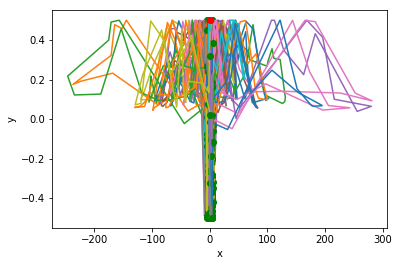

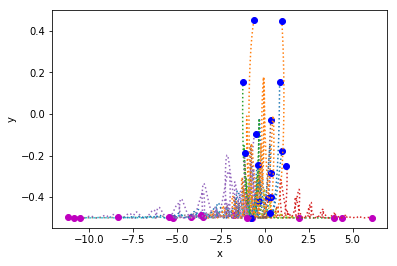

Training on 400/400 trajs
1548573331.26

saving torch state dict -> GPU_model.pt
rsync-ing files to remote
remotely training!
args:  ['/home/rverkuil/integration/drake-pytorch/python/remote_train.py', '1', '10', '15', '0.01']
(400, 21) (400, 21, 4) (400, 21, 1)
(21,) (21, 4) (21, 1)
True 10 15 0.01
(8000, 4)
(8000, 1)
using prox cost!
[1,    10] loss: 1579.129 prox_loss: 0.000
[2,    10] loss: 1493.005 prox_loss: 0.000
[3,    10] loss: 1423.905 prox_loss: 0.000
[4,    10] loss: 1366.471 prox_loss: 0.000
[5,    10] loss: 1315.706 prox_loss: 0.000
[6,    10] loss: 1279.453 prox_loss: 0.000
[7,    10] loss: 1252.326 prox_loss: 0.000
[8,    10] loss: 1226.332 prox_loss: 0.000
[9,    10] loss: 1202.894 prox_loss: 0.000
[10,    10] loss: 1190.190 prox_loss: 0.000
[11,    10] loss: 1170.308 prox_loss: 0.000
[12,    10] loss: 1154.020 prox_loss: 0.000
[13,    10] loss: 1138.412 prox_loss: 0.000
[14,    10] loss: 1122.636 prox_loss: 0.000
[15,    10] loss: 1116.249 prox_loss: 0.000
Finished Tra

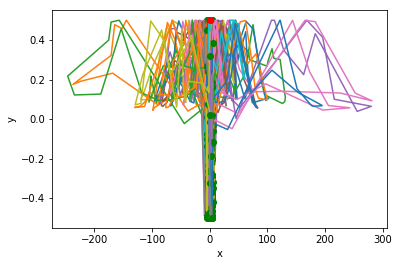

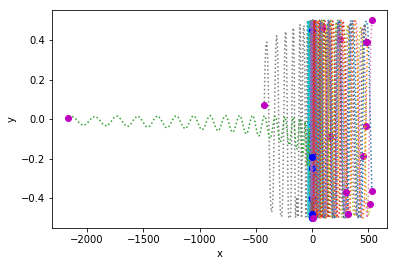

0 took 15.10s
20 took 15.10s
10 took 15.16s
30 took 15.09s
50 took 15.09s
40 took 15.14s
70 took 15.10s
60 took 15.23s
80 took 15.15s
90 took 15.10s
110 took 15.10s
120 took 15.20s
100 took 15.32s
130 took 15.22s
140 took 15.21s
150 took 15.13s
160 took 15.16s
170 took 15.16s
190 took 15.14s
180 took 15.24s
200 took 15.14s
210 took 15.12s
220 took 15.10s
230 took 15.10s
250 took 15.11s
240 took 15.14s
260 took 15.12s
270 took 15.14s
280 took 15.13s
290 took 15.08s
300 took 15.17s
310 took 15.08s
320 took 15.12s
330 took 15.08s
340 took 15.11s
350 took 15.07s
370 took 15.09s
360 took 15.19s
390 took 15.08s
380 took 15.14s
Training on 397/400 trajs
1548573468.8

saving torch state dict -> GPU_model.pt
rsync-ing files to remote
remotely training!
args:  ['/home/rverkuil/integration/drake-pytorch/python/remote_train.py', '1', '10', '15', '0.01']
(397, 21) (397, 21, 4) (397, 21, 1)
(21,) (21, 4) (21, 1)
True 10 15 0.01
(7940, 4)
(7940, 1)
using prox cost!
[1,    10] loss: 465.248 prox_loss:

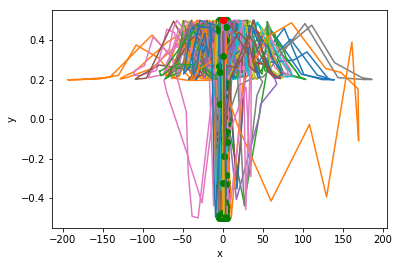

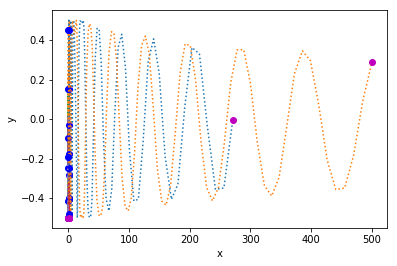

0 took 15.15s
20 took 15.09s
30 took 15.09s
10 took 15.22s
40 took 15.16s
50 took 15.14s
60 took 15.15s
70 took 15.12s
120 took 15.09s
90 took 15.23s
110 took 15.17s
80 took 15.31s
130 took 15.12s
100 took 15.30s
140 took 15.21s
150 took 15.15s
160 took 15.25s
170 took 15.18s
180 took 15.14s
200 took 15.16s
210 took 15.17s
190 took 15.27s
220 took 15.10s
230 took 15.10s
240 took 15.18s
250 took 15.09s
260 took 15.16s
290 took 15.11s
270 took 15.18s
300 took 15.09s
280 took 15.15s
310 took 15.09s
320 took 15.18s
330 took 15.17s
340 took 15.22s
350 took 15.08s
360 took 15.15s
370 took 15.08s
380 took 15.06s
390 took 15.09s
Training on 398/400 trajs
1548573605.84

saving torch state dict -> GPU_model.pt
rsync-ing files to remote
remotely training!
args:  ['/home/rverkuil/integration/drake-pytorch/python/remote_train.py', '1', '10', '15', '0.01']
(398, 21) (398, 21, 4) (398, 21, 1)
(21,) (21, 4) (21, 1)
True 10 15 0.01
(7960, 4)
(7960, 1)
using prox cost!
[1,    10] loss: 341.214 prox_loss

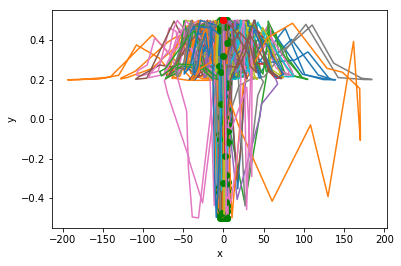

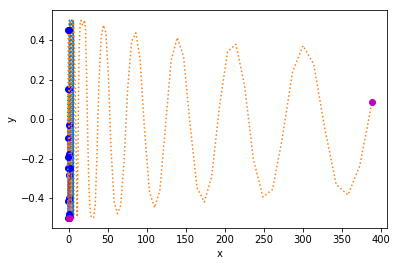

0 took 15.08s
10 took 15.20s
20 took 15.10s
30 took 15.08s
40 took 15.12s
50 took 15.09s
60 took 15.19s
70 took 15.09s
80 took 15.13s
90 took 15.15s
100 took 15.12s
110 took 15.09s
120 took 15.11s
130 took 15.09s
140 took 15.09s
150 took 15.19s
160 took 15.21s
170 took 15.12s
190 took 15.12s
180 took 15.26s
210 took 15.09s
200 took 15.13s
220 took 15.10s
230 took 15.10s
240 took 15.11s
250 took 15.10s
260 took 15.13s
270 took 15.16s
290 took 15.11s
280 took 15.19s
310 took 15.10s
300 took 15.13s
320 took 15.11s
330 took 15.19s
340 took 15.17s
350 took 15.08s
360 took 15.12s
370 took 15.09s
380 took 15.07s
390 took 15.13s
Training on 397/400 trajs
1548573742.81

saving torch state dict -> GPU_model.pt
rsync-ing files to remote
remotely training!
args:  ['/home/rverkuil/integration/drake-pytorch/python/remote_train.py', '1', '10', '15', '0.01']
(397, 21) (397, 21, 4) (397, 21, 1)
(21,) (21, 4) (21, 1)
True 10 15 0.01
(7940, 4)
(7940, 1)
using prox cost!
[1,    10] loss: 345.571 prox_loss

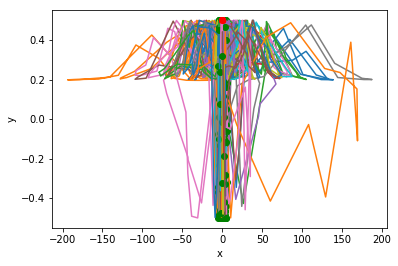

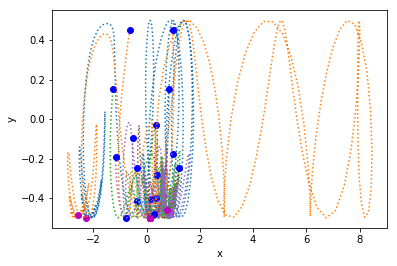

0 took 15.15s
10 took 15.13s
20 took 15.10s
30 took 15.13s
40 took 15.10s
50 took 15.11s
60 took 15.19s
70 took 15.17s
80 took 15.09s
90 took 15.10s
100 took 15.18s
110 took 15.19s
120 took 15.20s
130 took 15.15s
140 took 15.17s
150 took 15.12s
160 took 15.13s
170 took 15.09s


In [ ]:
%matplotlib inline
# First let's just see what Igor Optimization does on pendulum
def kNetConstructor():
    return MLP(4, 128, layer_norm=False)
net = kNetConstructor()
expmt = "cartpole"
ic_list=None

# warm_start=None
# warm_start="linear"
# warm_start="random"
warm_start="target"
np.random.seed(1776)
do_igor_optimization(net, kNetConstructor, expmt, ic_list, naive=False, warm_start=warm_start)

In [ ]:
import torch
torch.save(net.state_dict(), "trained_net.pth")

In [ ]:
%matplotlib inline
from traj.vi_utils import (do_dircol_cartpole)
import time

start = time.time()
dircol, result = do_dircol_cartpole(ic           = (-10., 0., 0., 0.), 
                   num_samples  = 42, 
                   min_timestep = 0.1, 
                   max_timestep = 0.4, 
                   warm_start   = "linear", 
                   seed         = 1776, 
                   should_vis   = False, 
                   torque_limit = 250., 
                   target_traj  = None)
print("took {}".format(time.time() - start))





## Applying to to Pendulum

In [ ]:
# First let's just see what Igor Optimization does on pendulum
net = FCBIG(2, 128)
expmt = "pendulum"
num_trajectories = # TODO: have some default for pendulum and cartpole
ic_list = initial_conditions_grid(num_trajectories, ) # TODO: have some default for pendulum and cartpole
do_igor_optimization(net, expmt, ic_list, warm_start=None, num_trajectories=num_trajectories)

In [ ]:
# Then let's experiment with the different minibatch schemes.
# First let's find a good batch size
ic_gen    = # Expmt default
n_iters   = 
inner_fn  = 
network   = 
traj_bank = []
mini_batch_and_warm_start(ic_gen, n_iters, inner_fn, network, warm_start_method, traj_bank)

In [ ]:
# Method1
warm_start_method = 
mini_batch_and_warm_start(ic_gen, n_iters, inner_fn, network, warm_start_method, traj_bank)

In [ ]:
# Method2
warm_start_method = 
mini_batch_and_warm_start(ic_gen, n_iters, inner_fn, network, warm_start_method, traj_bank)

In [ ]:
# Method3
warm_start_method = 
mini_batch_and_warm_start(ic_gen, n_iters, inner_fn, network, warm_start_method, traj_bank)

In [ ]:
# Method4
warm_start_method = 
mini_batch_and_warm_start(ic_gen, n_iters, inner_fn, network, warm_start_method, traj_bank)

In [ ]:
# Method5
warm_start_method = 
mini_batch_and_warm_start(ic_gen, n_iters, inner_fn, network, warm_start_method, traj_bank)

In [ ]:
# Method6
warm_start_method = 
mini_batch_and_warm_start(ic_gen, n_iters, inner_fn, network, warm_start_method, traj_bank)

In [ ]:
# Now with adding dropout to favorite warm-starting scheme above


## Applying to to Cartpole

## Compare best method to VI solutions?

<IPython.core.display.Javascript object>


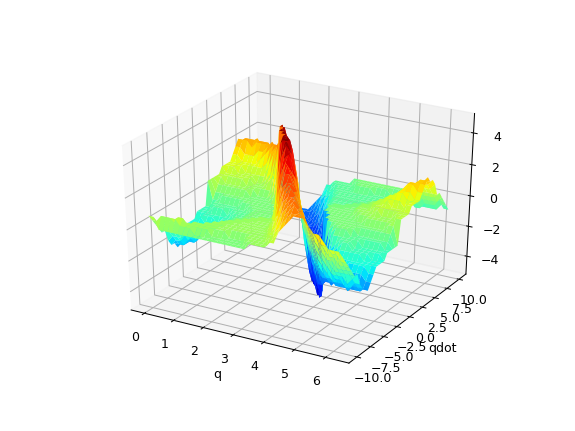

<IPython.core.display.Javascript object>


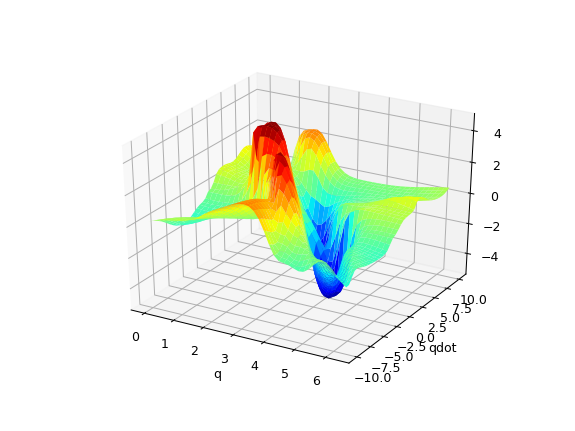

In [211]:
from traj.vi_utils import (
    load_vi_policy,
    vis_vi_policy,
    vis_nn_policy_like_vi_policy
)
vi_policy = load_vi_policy('good', "pendulum")
vis_vi_policy(vi_policy)
vis_nn_policy_like_vi_policy(net, vi_policy)

using_ics=  False
knot_MSE: [13.43466199], traj_MSE: [50.41605436]
[(80000, 2), (80000, 1), (80000, 1)]


<IPython.core.display.Javascript object>


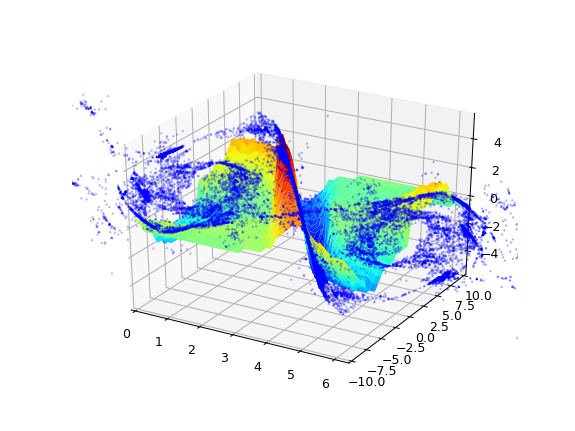

In [201]:
from traj.vi_utils import (graph_vi_policy_vs_traj_knot_scatter)

# ics_or_dircols = ics
ics_or_dircols = dircols
graph_vi_policy_vs_traj_knot_scatter(vi_policy, ics_or_dircols, 
                                     combine_vi_policy_and_scatter=True,
                                     plot_residual=False)